# Read in the PREC ACC data from the netCDF file

All of these files can be accessed at https://rda.ucar.edu/datasets/ds612.0/

In this example, two files are converted to 3-hr sums, combined into one dataset, and then saved as a netCDF file.

In [ ]:
import xarray as xr

# load in two prec acc datasets
rain_ds_1 = xr.open_dataset("../example_data/rain_data/wrf2d_d01_CTRL_PREC_ACC_NC_200101-200103.nc")
rain_ds_2 = xr.open_dataset("../example_data/rain_data/wrf2d_d01_CTRL_PREC_ACC_NC_200104-200106.nc")

# Resample each rain dataset to 3-hour sums
rain_ds_1_3h = rain_ds_1.resample(Time='3H').sum('Time')
rain_ds_2_3h = rain_ds_2.resample(Time='3H').sum('Time')

# combine the two 3h rain datasets. Make this a loop over a bunch of them in the future. THIS USES UP ALL THE MEMORY ON MAC NEED TO RUN THIS ON A CLUSTER.
rain_ds_3h = xr.concat([rain_ds_1_3h, rain_ds_2_3h], dim="Time")

# Save the combined 3h rain dataset to a NetCDF file
rain_ds_3h.to_netcdf("../example_data/rain_data/3H_sum_PREC_ACC_CTRL_200101-200106.nc")

rain_ds_3h.PREC_ACC_NC

/Users/jinjiang-macair/anaconda3/envs/future_snow/lib/python3.11/site-packages/xarray/groupers.py:392: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  self.index_grouper = pd.Grouper(
/Users/jinjiang-macair/anaconda3/envs/future_snow/lib/python3.11/site-packages/xarray/groupers.py:392: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  self.index_grouper = pd.Grouper(


## Examine the Time dimension

We see the data are from every hour.

In [2]:
rain_ds_3h.Time

<xarray.DataArray 'Time' (Time: 1448)> Size: 12kB
array(['2001-01-01T00:00:00.000000000', '2001-01-01T03:00:00.000000000',
       '2001-01-01T06:00:00.000000000', ..., '2001-06-30T15:00:00.000000000',
       '2001-06-30T18:00:00.000000000', '2001-06-30T21:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * Time     (Time) datetime64[ns] 12kB 2001-01-01 ... 2001-06-30T21:00:00
Attributes:
    long_name:    Time
    description:  Time

# Plot the 3H data on a simple map

Text(0.5, 1.0, 'PREC ACC Accumulation (mm) valid 2001-01-28 12 - 14 UTC')

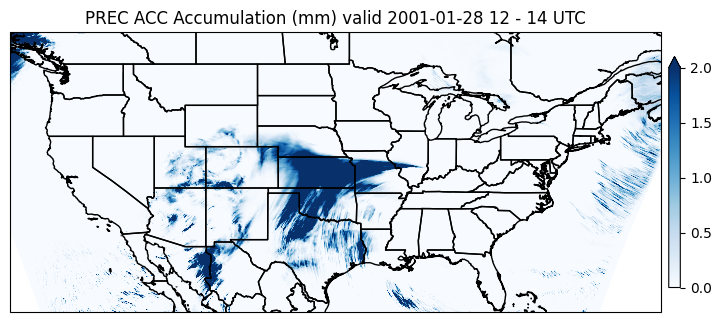

In [4]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = 10, 10

ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-128, -65, 25, 48])

ax.add_feature(cfeature.STATES.with_scale('10m'))

example = rain_ds_3h.sel(Time='2001-01-28 12:00:00')

mmp = ax.pcolormesh(example.XLONG, example.XLAT, example.PREC_ACC_NC, vmax=2, cmap='Blues')

plt.colorbar(mmp, ax=ax, shrink=0.3, pad=0.01, extend='max')

plt.title("PREC ACC Accumulation (mm) valid 2001-01-28 12 - 14 UTC")